# Chargement 
### Librairies

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import sqrt
import random
from pandas import read_csv
from scipy.spatial.distance import euclidean

### Jeu de données

In [ ]:
got = pd.read_csv('https://raw.githubusercontent.com/astridgcn/Info/main/got.csv', header = 0, sep= ';', decimal = '.')
got

,S.No,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
0,1,Arya Stark,0,Northmen,House Stark,1,1,1,1,1,0,1,8,1.0,1
1,2,Barristan Selmy,1,Westeros,House Selmy,1,1,1,1,1,0,1,0,1.0,1
2,3,Bran Stark,1,Northmen,House Stark,1,1,1,1,1,0,1,7,1.0,1
3,4,Cersei Lannister,0,Westerlands,House Lannister,1,1,1,1,1,1,1,9,1.0,1
4,5,Daenerys Targaryen,0,Valyrian,House Targaryen,1,1,1,1,1,1,1,15,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,251,Walder Frey (son of Merrett),1,NaN,House Frey,0,0,0,0,0,0,0,0,0.0,0
1933,250,Walder Frey (son of Ryman),1,Rivermen,House Frey,0,0,0,0,0,0,0,0,0.0,1
1934,261,Wate,0,NaN,House Targaryen,0,0,0,0,0,0,0,0,0.0,1
1935,24,Willum,1,NaN,NaN,1,0,0,0,0,0,1,0,0.0,1


In [ ]:
print(got.shape) # forme des données
print(got.dtypes) # types de données

(1937, 14)
name                 object
male                  int64
culture              object
house                object
book1                 int64
book2                 int64
book3                 int64
book4                 int64
book5                 int64
isMarried             int64
isNoble               int64
numDeadRelations      int64
popularity          float64
isAlive               int64
dtype: object


In [ ]:
got.iloc[1,4] # test index

'House Selmy'

## Traitement

### Suppression des données manquantes

In [ ]:
#got.dropna()

### Sélection des données
#### Étude des corrélations

In [34]:
corr = got.corr(method = 'pearson').round(3)
corr
# Forte corr : male, book1, book4, numDeadRelations, popularity

,S.No,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,1.000,0.110,0.236,0.274,0.335,0.256,0.367,0.111,0.207,0.002,0.160,-0.134
male,0.110,1.000,0.085,0.062,0.025,-0.062,0.063,-0.083,0.158,0.029,0.131,-0.144
book1,0.236,0.085,1.000,0.390,0.242,0.077,0.263,0.084,0.093,0.202,0.346,-0.147
book2,0.274,0.062,0.390,1.000,0.449,0.173,0.224,0.157,0.020,0.086,0.274,-0.068
book3,0.335,0.025,0.242,0.449,1.000,0.371,0.282,0.149,0.020,0.064,0.241,0.007
book4,0.256,-0.062,0.077,0.173,0.371,1.000,0.334,0.125,0.075,0.005,0.142,0.270
book5,0.367,0.063,0.263,0.224,0.282,0.334,1.000,0.093,0.098,0.114,0.239,0.034
isMarried,0.111,-0.083,0.084,0.157,0.149,0.125,0.093,1.000,0.162,0.199,0.294,-0.044
isNoble,0.207,0.158,0.093,0.020,0.020,0.075,0.098,0.162,1.000,0.095,0.174,-0.042
numDeadRelations,0.002,0.029,0.202,0.086,0.064,0.005,0.114,0.199,0.095,1.000,0.586,-0.177


<AxesSubplot:>

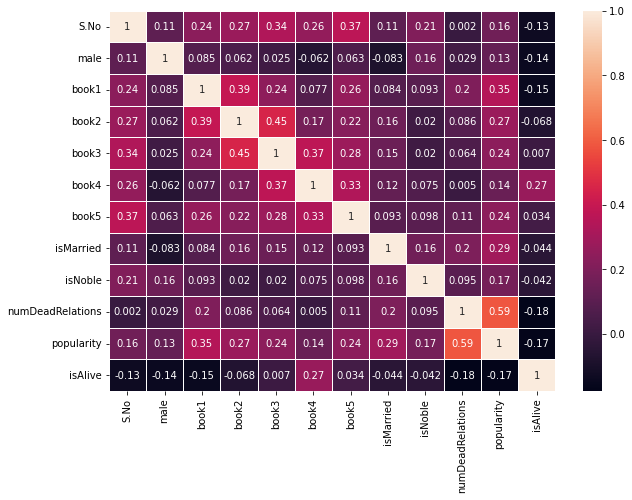

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(data = corr, annot = True, linewidth = .5)

## Distances
### Entre deux personnes
#### Utilisation de la distance de Manhattan (pour les vecteurs)

In [ ]:
def distance(prenom1, prenom2):
  personne1 = got.loc[got['name'] == prenom1,('male', 'book1', 'book4', 'numDeadRelations', 'popularity')] # on cherche le 1er prénom
  personne1 = personne1[['male', 'book1', 'book4', 'numDeadRelations', 'popularity']].values # on récupère les variables qui nous intéressent
  personne2 = got.loc[got['name'] == prenom2,('male', 'book1', 'book4', 'numDeadRelations', 'popularity')] # on cherche le 2ème prénom
  personne2 = personne2[['male', 'book1', 'book4', 'numDeadRelations', 'popularity']].values # on récupère les variables qui nous intéressent

  return np.sqrt(np.sum((personne1 - personne2) ** 2)) # pour ne pas utiliser SciPy

#### Test avec exemple

In [ ]:
distance('Arya Stark', 'Tyrion Lannister')

4.123105625617661

### Entre une personne et les autres

In [ ]:
def distanceall(prenom):
  #distances = [] # liste des distances
  distances = pd.DataFrame(columns = ['Prénom', 'Distance']) # on crée un tableau
  for i in range(len(got)):
    if got.iloc[i,0] != prenom : # on exclut la personne
      prenom2 = got.iloc[i,0] # on récupère le 2ème prénom
      dist = distance(prenom, prenom2) # on calcule la distance entre les deux 
      ligne = [prenom2, dist]
      distances.loc[len(distances)] = ligne # on l'ajoute à notre tableau

  distances.sort_values(by = ['Distance'], inplace = True) # on range le tableau par ordre croissant

  return distances # on affiche la liste 

#### Test avec exemple

In [ ]:
distanceall('Arya Stark')

## Prédiction
### Fonction de prédiction

In [ ]:
def predict (prenom, k):
  distances = distanceall(prenom) # on calcule sa distance avec tous les autres
  distancesk = distances.head(k) # on affiche les k premiers
  kAlive = 0
  # On récupère les valeurs 'isAlive' des k plus proches voisins
  for i in range(k):
    prenomn = distancesk.iloc[i,0] # on récupère le prénom du k plus proche voisin
    personne = got.loc[got['name'] == prenomn, ('isAlive')].values
    kAlive += personne[0] # on augmente le compteur de voisin·es vivant·es
  mid = math.ceil(k/2)
  
  # On récupère la vraie valeur de isAlive
  alive = got.loc[got['name'] == prenom,'isAlive'] # on cherche le 1er prénom
  # On classifie selon les valeurs 'isAlive' des k plus proches voisins
  print(kAlive, "de ses", k, "plus proches voisins sont vivants.")
  if kAlive >= mid:
    print("Donc", prenom, "est probablement vivant·e.")
    if alive.values[0] == 1:
      print("Ce qui est une bonne prédiction")
    else:
      print("Ce qui est une mauvaise prédiction")
  else:
    print("Donc", prenom, "est probablement mort·e.")
    if alive.values[0] == 0:
      print("Ce qui est une bonne prédiction")
    else:
      print("Ce qui est une mauvaise prédiction")

#### Test avec exemple

In [ ]:
predict('Arya Stark', 5)

3 de ses 5 plus proches voisins sont vivants.
Donc Arya Stark est probablement vivant·e.
Ce qui est une bonne prédiction


### Leave-one-out
- Tester plusieurs pondérations
- Tester pour chaque exemple 
- Mesurer taux de prédictions correctes (nb succès / nb exemple total)

#### Entre deux personnes
Avec les poids

In [ ]:
def distancep(prenom1, prenom2, poids1, poids2, poids3, poids4, poids5):
  personne1 = got.loc[got['name'] == 'Arya Stark',('male', 'book1', 'book4', 'numDeadRelations', 'popularity')] # on cherche le 1er prénom
  personne1 = personne1[['male', 'book1', 'book4', 'numDeadRelations', 'popularity']].values # on récupère les variables qui nous intéressent
  personne2 = got.loc[got['name'] == 'Tyrion Lannister',('male', 'book1', 'book4', 'numDeadRelations', 'popularity')] # on cherche le 2ème prénom
  personne2 = personne2[['male', 'book1', 'book4', 'numDeadRelations', 'popularity']].values # on récupère les variables qui nous intéressent

  dist = sqrt((personne2[0, 0] * poids1 - personne1[0, 0] * poids1)**2 + (personne2[0, 1] * poids2 - personne1[0, 1] * poids2)**2 + (personne2[0, 2] * poids3 - personne1[0, 2] * poids3)**2 + (personne2[0, 3] * poids4 - personne1[0, 3] * poids4)**2 + (personne2[0, 4] * poids5 - personne1[0, 4] * poids5)**2)
  return dist # on calcule la distance pondérée

Test avec deux exemples

In [ ]:
distancep('Arya Stark', 'Tyrion Lannister', 0.2, 0.1, 0.1, 0.3, 0.3)

1.2165525060596436

#### Entre une personne et les autres
Avec les poids

In [ ]:
def distanceallp(prenom, poids1, poids2, poids3, poids4, poids5):
  #distances = [] # liste des distances
  distances = pd.DataFrame(columns = ['Prénom', 'Distance']) # on crée un tableau

  # On parcourt tout le tableau
  for i in range(len(got)):
    if got.iloc[i,0] != prenom: # on exclut la personne
      prenom2 = got.iloc[i,0] # on récupère le 2ème prénom
      dist = distancep(prenom, prenom2, poids1, poids2, poids3, poids4, poids5) # on calcule la distance entre les deux 
      ligne = [prenom2, dist]
      distances.loc[len(distances)] = ligne # on l'ajoute à notre tableau

  # On classe les distances
  distances.sort_values(by = ['Distance'], inplace = True) # on range le tableau par ordre croissant
  return distances # on affiche la liste 

#### Essai sur tous

In [ ]:
def predictp(k):
  suc = 0 # nombres de bonnes prédictions

  for i in range(len(got)): 
  #for i in range(10):  # test
    prenom = got.iloc[i,0] # on récupère le prenom
    poids1 = round(random.uniform(0, 1), 2) # on génère le 1er poids entre 0 et 1
    poids2 = round(random.uniform(0, 1-poids1), 2) # on génère le 2ème poids entre 0 etle 1er
    poids3 = round(random.uniform(0, 1-(poids2 + poids1)), 2) # on génère le 3ème poids entre 0 et les 2 autres
    poids4 = round(random.uniform(0, 1-(poids3 + poids2 + poids1)), 2) # on génère le 4ème poids entre 0 et les 3 autres 
    poids5 = round(random.uniform(0, 1-(poids4 + poids3 + poids2 + poids1)), 2) # on génère le 5ème poids entre 0 et les 4 autres
    distances = distanceallp(prenom, poids1, poids2, poids3, poids4, poids5) # on calcule sa distance avec tous les autres
    distancesk = distances.head(k) # on affiche les k premiers
    kAlive = 0

    # On récupère la vraie valeur de isAlive
    alive = got.loc[got['name'] == prenom,'isAlive'] # on cherche le 1er prénom

    # On récupère les valeurs 'isAlive' des k plus proches voisins
    for j in range(k):
      prenomn = distancesk.iloc[j,0] # on récupère le prénom du k plus proche voisin
      personne = got.loc[got['name'] == prenomn, ('isAlive')].values
      kAlive += personne[0]
    mid = math.ceil(k/2)
    
    # On classifie selon les valeurs 'isAlive' des k plus proches voisins
    if kAlive >= mid:
      if alive.values[0] == 1:
        suc += 1
    else:
      if alive.values[0] == 0:
        suc += 1
  acc = suc / len(got)
  #acc = suc / 10 # test
  print("Avec", k, "voisins et les poids suivants :", poids1,"pour la variable 'male'", poids2, "pour la variable 'book1'", poids3, "pour la variable 'book4'", poids4, "pour la variable 'numDeadRelations'", poids5, "pour la variable 'popularity', on obtient une précision de", acc)
  return poids1, poids2, poids3, poids4, poids4, k, acc

In [ ]:
predictp(5)

Avec 5 voisins et les poids suivants : 0.49 pour la variable 'male' 0.43 pour la variable 'book1' 0.07 pour la variable 'book4' 0.01 pour la variable 'numDeadRelations' 0.0 pour la variable 'popularity', on obtient une précision de 0.9


(0.49, 0.43, 0.07, 0.01, 0.01, 5, 0.9)

## Export / Import
Les paramètres vont maintenant être lus non plus dans votre code mais dans un fichier externe.
Cela vous permettra de réaliser plusieurs simulations en allant à chaque fois lire les paramètres de la simulation dans ce fichier.
Vous ferez également un fichier resultats.txt, dans lequel vous irez écrire les paramètres et le taux de succès de votre algorithme à chaque simulation. 
Ce fichier de paramètres peut être généré automatiquement par un autre script, ou par Excel.

### Export 
#### Test de plusieurs paramètres

In [ ]:
def predictpk(n, k):
  for i in range(n): # on le fait n fois (change les pondérations à chaque fois)
    predictp(k)
    print("Avec", k, "voisins et les poids suivants:", poids1,"pour la variable 'male'", poids2, "pour la variable 'book1'", poids3, "pour la variable 'book4'", poids4, "pour la variable 'numDeadRelations'", poids5, "pour la variable 'popularity'", "on obtient une précision de", acc)
  
    filename = "resultats_essai" + str(n) + ".txt"
    line = "Avec " + str(k) + " voisins et les poids suivants : " + str(poids1) + " pour la variable 'male' " + str(poids2) + " pour la variable 'book1' " + str(poids3) + " pour la variable 'book4' " + str(poids4) + " pour la variable 'numDeadRelations' " + str(poids5) + " pour la variable 'popularity', on obtient une précision de " + str(acc)
    with openopen(filename, "w") as f:
      f.write(line)

Test

In [ ]:
predictpk(1,5)

### Import

In [ ]:
param = pd.read_csv('https://raw.githubusercontent.com/astridgcn/Info/main/param.csv', header = None, sep= ';')

In [ ]:
def predictpimp(k, poids1, poids2, poids3, poids4, poids5):
  suc = 0 # nombres de bonnes prédictions

  for i in range(len(got)):
  #for i in range(10):
    prenom = got.iloc[i,0] # on récupère le prenom
    distances = distanceallp(prenom, poids1, poids2, poids3, poids4, poids5) # on calcule sa distance avec tous les autres
    distancesk = distances.head(k) # on affiche les k premiers
    kAlive = 0

    # On récupère la vraie valeur de isAlive
    alive = got.loc[got['name'] == prenom,'isAlive'] # on cherche le 1er prénom

    # On récupère les valeurs 'isAlive' des k plus proches voisins
    for j in range(k):
      prenomn = distancesk.iloc[j,0] # on récupère le prénom du k plus proche voisin
      personne = got.loc[got['name'] == prenomn, ('isAlive')].values
      kAlive += personne[0]
    mid = math.ceil(k/2)
    
    # On classifie selon les valeurs 'isAlive' des k plus proches voisins
    if kAlive >= mid:
      if alive.values[0] == 1:
        suc += 1
    else:
      if alive.values[0] == 0:
        suc += 1
  acc = suc / len(got)
  #acc = suc / 10
  print("Avec", k, "voisins et les poids suivants :", poids1,"pour la variable 'male'", poids2, "pour la variable 'book1'", poids3, "pour la variable 'book4'", poids4, "pour la variable 'numDeadRelations'", poids5, "pour la variable 'popularity', on obtient une précision de", acc)
  return poids1, poids2, poids3, poids4, poids4, k, acc

In [ ]:
predictpimp(param.iloc[0,0], param.iloc[0,1], param.iloc[0,2], param.iloc[0,3], param.iloc[0,4], param.iloc[0,5])